# BFS

In [2]:
from collections import defaultdict


class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def BFS(self, s):
        visited = [False] * (len(self.graph))
        queue = []
        queue.append(s)
        visited[s] = True
        while queue:
            s = queue.pop(0)
            print(s, end=" ")
            for i in self.graph[s]:
                if visited[i] == False:
                    queue.append(i)
                    visited[i] = True


g = Graph()
g.addEdge(0, 4)
g.addEdge(0, 8)
g.addEdge(4, 8)
g.addEdge(8, 0)
g.addEdge(8, 3)
g.addEdge(3, 3)
g.BFS(2)


2 

# DFS

In [3]:
graph = {"A": ["B", "C"], "B": ["D", "E"], "C": ["F"], "D": [], "E": ["F"], "F": []}
visited = set()


def dfs(visited, graph, vertice):
    if vertice not in visited:
        print(vertice)
        visited.add(vertice)
        for neighbour in graph[vertice]:
            dfs(visited, graph, neighbour)


dfs(visited, graph, "A")

A
B
D
E
F
C


# DIJSKTRA

In [7]:
!pip install networkx

[0, 1, 2]
{0: 0, 1: 1, 2: 2}
{0: inf, 1: 1, 2: 2}
{0: None, 1: 0, 2: 1}
2


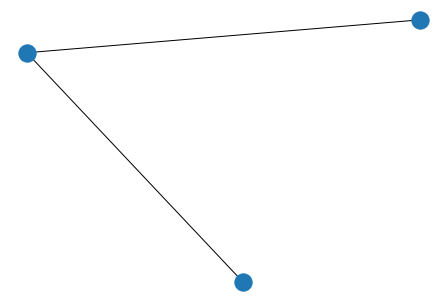

In [8]:
import networkx as nx
import matplotlib.pyplot as plt


def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        path.append(parent[path[-1]])
    path.reverse()
    return path


def dijkstra(graph, source, target):
    queue = []
    visited = {}
    distance = {}
    shortest_distance = {}
    parent = {}
    for vertice in range(len(graph)):
        distance[vertice] = None
        visited[vertice] = False
        parent[vertice] = None
        shortest_distance[vertice] = float("inf")

    queue.append(source)
    distance[source] = 0
    while len(queue) != 0:
        current = queue.pop(0)
        visited[current] = True
        if current == target:
            print(backtrace(parent, source, target))

        for neighbor in graph[current]:
            if visited[neighbor] == False:
                distance[neighbor] = distance[current] + 1
                if distance[neighbor] < shortest_distance[neighbor]:
                    shortest_distance[neighbor] = distance[neighbor]
                    parent[neighbor] = current
                    queue.append(neighbor)
    print(distance)
    print(shortest_distance)
    print(parent)
    print(target)

G = nx.Graph()
G.add_weighted_edges_from([(0, 1, 0), (1, 2, 0)])
dijkstra(G, 0, 2)
nx.draw(G)
plt.show()


# FLOYD WARSHALL

In [10]:
inf = 1e10


def floyd_warshall(weights):
    V = len(weights)
    distance_matrix = weights
    for k in range(V):
        next_distance_matrix = [list(row) for row in distance_matrix]
        for i in range(V):
            for j in range(V):
                next_distance_matrix[i][j] = min(
                    distance_matrix[i][j], distance_matrix[i][k] + distance_matrix[k][j]
                )
        distance_matrix = next_distance_matrix
    return distance_matrix


graph = [[0, inf, inf, -3], [inf, 0, inf, 8], [inf, 4, 0, -2], [5, inf, 3, 0]]

print(floyd_warshall(graph))


[[0, 4, 0, -3], [13, 0, 11, 8], [3, 4, 0, -2], [5, 7, 3, 0]]
